In [ ]:
#The below is the in-depth analysis of traffic stop data to uncover patterns and trends. Please find the dataset here.
#https://www.kaggle.com/datasets/melihkanbay/police

In [ ]:
#import libraries

In [3]:
import pandas as pd

In [8]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 11.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [10]:
import seaborn as sns

In [17]:
police_data=pd.read_csv("/Users/vamsidharreddypapagatla/Downloads/police.csv")

In [18]:
police_data.head(10)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,2005-03-23,09:45,NaN,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,NaN,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,2005-06-06,13:20,NaN,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,2005-07-13,10:15,NaN,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,2005-07-13,15:45,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [14]:
df.shape

(91741, 15)

In [15]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [30]:
# Check the column names in the dataset
print(police_data.columns)

Index(['county_name', 'driver_gender', 'driver_age_raw', 'driver_age',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'stop_datetime'],
      dtype='object')


In [ ]:
# Fill missing county_name with 'Unknown'
police_data['county_name'] = police_data['county_name'].fillna('Unknown')

# Check for remaining missing values
missing_values = police_data.isnull().sum()

# Preview missing values
print(missing_values)


In [31]:
# Add day_of_week column
police_data['day_of_week'] = pd.to_datetime(police_data['stop_datetime']).dt.day_name()

In [32]:
# Display a preview of the dataset
police_data[['stop_datetime', 'day_of_week']].head()

,stop_datetime,day_of_week
0,2005-01-02 01:55:00,Sunday
1,2005-01-18 08:15:00,Tuesday
2,2005-01-23 23:15:00,Sunday
3,2005-02-20 17:15:00,Sunday
4,2005-03-14 10:00:00,Monday


In [33]:
# Categorize driver_age into groups
bins = [0, 18, 25, 35, 50, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']
police_data['age_group'] = pd.cut(police_data['driver_age'], bins=bins, labels=labels, right=False)

In [34]:
# Display the updated dataset
police_data[['driver_age', 'age_group']].head()

,driver_age,age_group
0,20.0,Young Adult
1,40.0,Middle-aged
2,33.0,Adult
3,19.0,Young Adult
4,21.0,Young Adult


In [35]:
# Fill missing values for county_name
police_data['county_name'] = police_data['county_name'].fillna('Unknown')

In [36]:
# Check for remaining missing values
print(police_data.isnull().sum())

county_name               0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
stop_datetime             0
day_of_week               0
age_group              5621
dtype: int64


In [37]:
# Fill categorical columns with 'Unknown'
categorical_columns = ['driver_gender', 'driver_race', 'violation_raw', 'violation', 'search_type', 'stop_outcome', 'stop_duration']
police_data[categorical_columns] = police_data[categorical_columns].fillna('Unknown')

In [38]:
# Fill numerical driver_age with the median value
police_data['driver_age'] = police_data['driver_age'].fillna(police_data['driver_age'].median())

In [39]:
# Recreating age_group since driver_age was updated
bins = [0, 18, 25, 35, 50, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']
police_data['age_group'] = pd.cut(police_data['driver_age'], bins=bins, labels=labels, right=False)

In [40]:
print(police_data.isnull().sum())

county_name              0
driver_gender            0
driver_age_raw        5327
driver_age               0
driver_race              0
violation_raw            0
violation                0
search_conducted         0
search_type              0
stop_outcome             0
is_arrested           5333
stop_duration            0
drugs_related_stop       0
stop_datetime            0
day_of_week              0
age_group                0
dtype: int64


In [41]:
# Drop driver_age_raw if not needed
police_data = police_data.drop(columns=['driver_age_raw'])

In [42]:
# Fill missing values in is_arrested with 'Unknown'
police_data['is_arrested'] = police_data['is_arrested'].fillna('Unknown')

In [43]:
print(police_data.isnull().sum())

county_name           0
driver_gender         0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
search_type           0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
stop_datetime         0
day_of_week           0
age_group             0
dtype: int64


In [44]:
import matplotlib.pyplot as plt

In [45]:
sns.set(style="whitegrid")

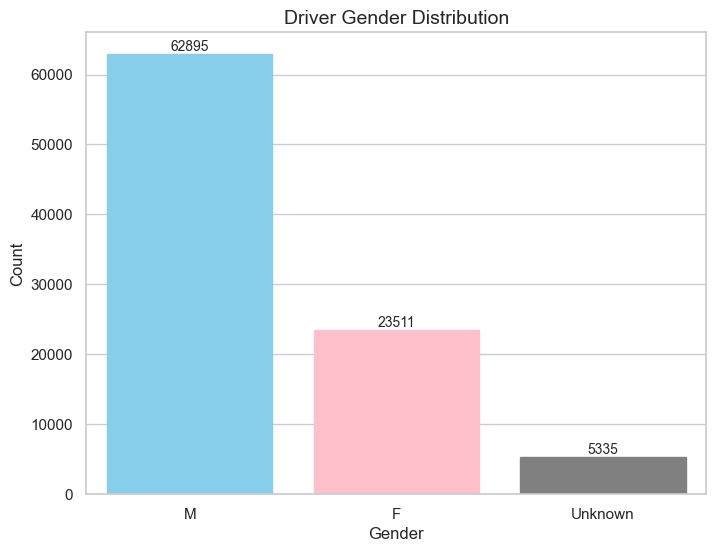

In [66]:
# Plot gender distribution
plt.figure(figsize=(8, 6))
bars = sns.countplot(data=police_data, x='driver_gender')

# Assign colors manually
colors = {'M': 'skyblue', 'F': 'pink'}
for bar, label in zip(bars.patches, police_data['driver_gender'].unique()):
    bar.set_color(colors.get(label, 'gray'))  # Map label to its color

# Annotate the total counts on top of each bar
for bar in bars.patches:
    count = int(bar.get_height())  # Get the height of each bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position horizontally at the center of the bar
        bar.get_height(),  # Position vertically at the top of the bar
        f'{count}',  # Display the count
        ha='center', va='bottom', fontsize=10  # Centered text
    )

# Add a title and labels
plt.title('Driver Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

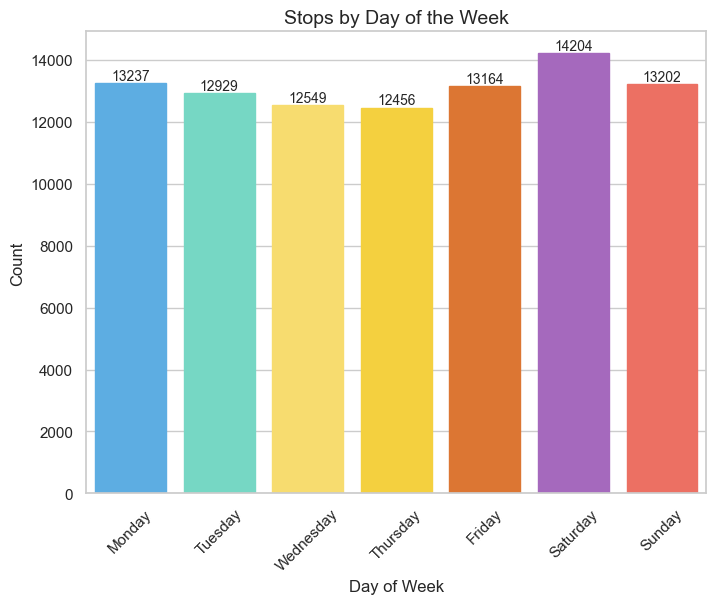

In [65]:
# Plot stops by day of the week
plt.figure(figsize=(8, 6))
bars = sns.countplot(
    data=police_data, 
    x='day_of_week', 
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Assign complementary colors
colors = ['#5DADE2', '#76D7C4', '#F7DC6F', '#F4D03F', '#DC7633', '#A569BD', '#EC7063']
for bar, color in zip(bars.patches, colors):
    bar.set_color(color)

# Annotate the total counts on top of each bar
for bar in bars.patches:
    count = int(bar.get_height())  # Get the height of each bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position horizontally at the center of the bar
        bar.get_height(),  # Position vertically at the top of the bar
        f'{count}',  # Display the count
        ha='center', va='bottom', fontsize=10  # Centered text
    )

# Add a title and labels
plt.title('Stops by Day of the Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


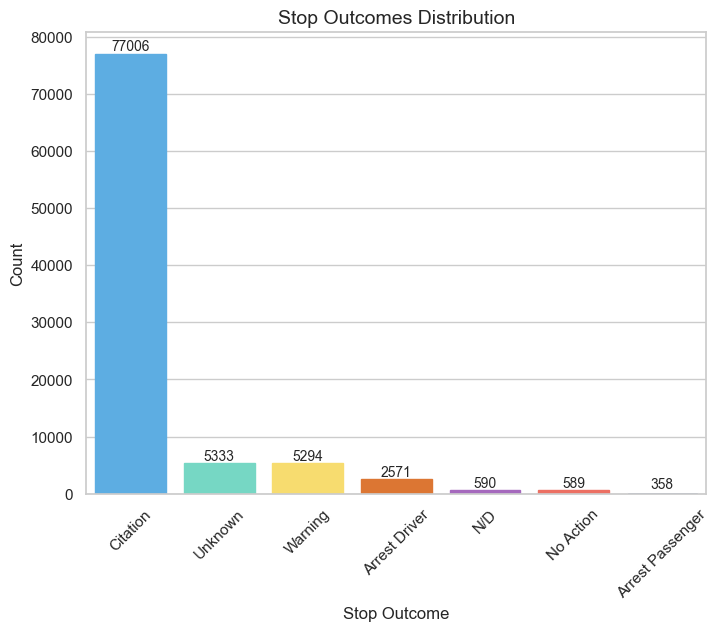

In [64]:
# Plot stop outcomes
plt.figure(figsize=(8, 6))
bars = sns.countplot(
    data=police_data, 
    x='stop_outcome', 
    order=police_data['stop_outcome'].value_counts().index
)

# Assign complementary tones for outcomes
colors = ['#5DADE2', '#76D7C4', '#F7DC6F', '#DC7633', '#A569BD', '#EC7063'][:len(bars.patches)]
for bar, color in zip(bars.patches, colors):
    bar.set_color(color)

# Annotate the total counts on top of each bar
for bar in bars.patches:
    count = int(bar.get_height())  # Get the height of each bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position horizontally at the center of the bar
        bar.get_height(),  # Position vertically at the top of the bar
        f'{count}',  # Display the count
        ha='center', va='bottom', fontsize=10  # Centered text
    )

# Add a title and labels
plt.title('Stop Outcomes Distribution', fontsize=14)
plt.xlabel('Stop Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [67]:
# Overall proportion of searches conducted
search_proportion = police_data['search_conducted'].value_counts(normalize=True) * 100
print("Search Conducted Proportion (%):")
print(search_proportion)

Search Conducted Proportion (%):
search_conducted
False    96.51628
True      3.48372
Name: proportion, dtype: float64


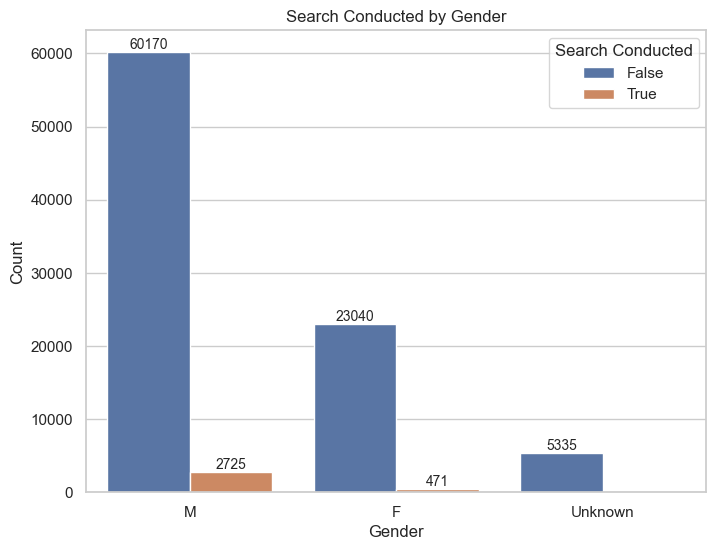

In [69]:
# Searches conducted by gender
plt.figure(figsize=(8, 6))
bars = sns.countplot(data=police_data, x='driver_gender', hue='search_conducted')
for bar in bars.patches:
    count = int(bar.get_height())
    if count > 0:  # Avoid displaying 0 counts
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{count}',
            ha='center', va='bottom', fontsize=10
        )
plt.title('Search Conducted by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Search Conducted', loc='upper right')
plt.show()

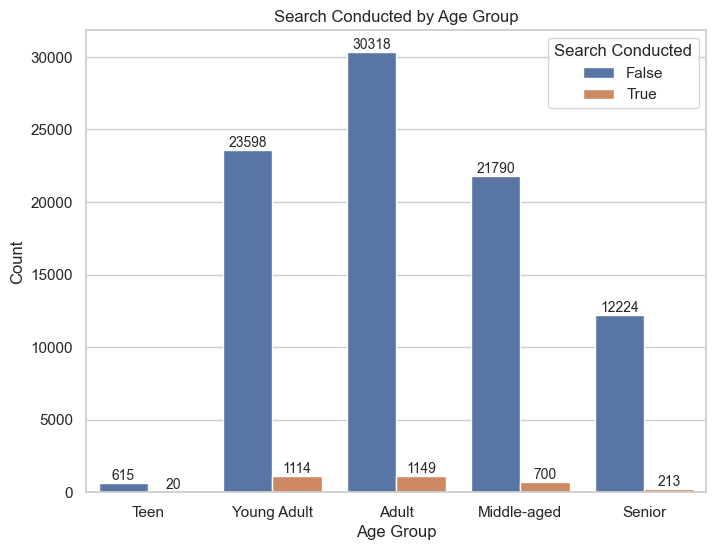

In [70]:
plt.figure(figsize=(8, 6))
bars = sns.countplot(data=police_data, x='age_group', hue='search_conducted')
for bar in bars.patches:
    count = int(bar.get_height())
    if count > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{count}',
            ha='center', va='bottom', fontsize=10
        )
plt.title('Search Conducted by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Search Conducted', loc='upper right')
plt.show()

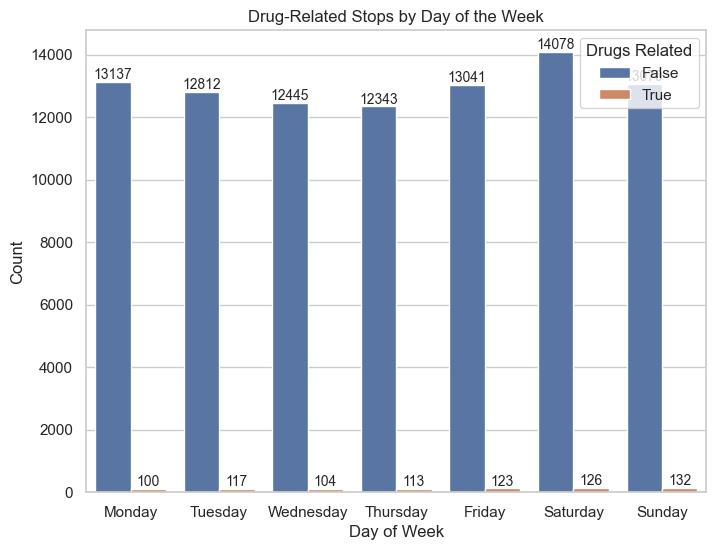

In [71]:
# Drug-related stops by day of the week
plt.figure(figsize=(8, 6))
bars = sns.countplot(
    data=police_data, 
    x='day_of_week', 
    hue='drugs_related_stop', 
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
for bar in bars.patches:
    count = int(bar.get_height())
    if count > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{count}',
            ha='center', va='bottom', fontsize=10
        )
plt.title('Drug-Related Stops by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Drugs Related', loc='upper right')
plt.show()

In [72]:
# Extract hour from stop_datetime
police_data['hour_of_day'] = pd.to_datetime(police_data['stop_datetime']).dt.hour

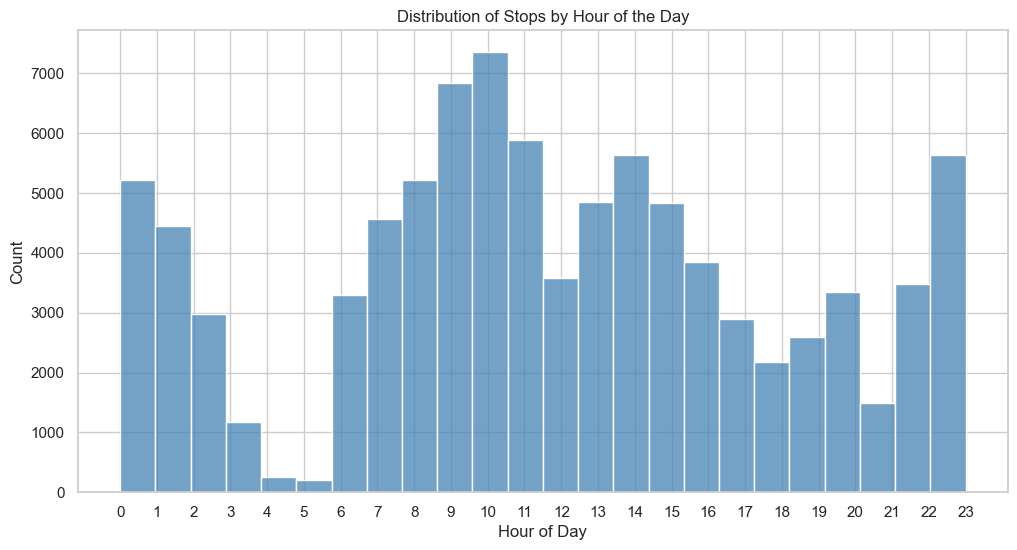

In [73]:
# Distribution of stops by hour
plt.figure(figsize=(12, 6))
sns.histplot(police_data['hour_of_day'], bins=24, kde=False, color='steelblue')
plt.title('Distribution of Stops by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(0, 24))
plt.show()

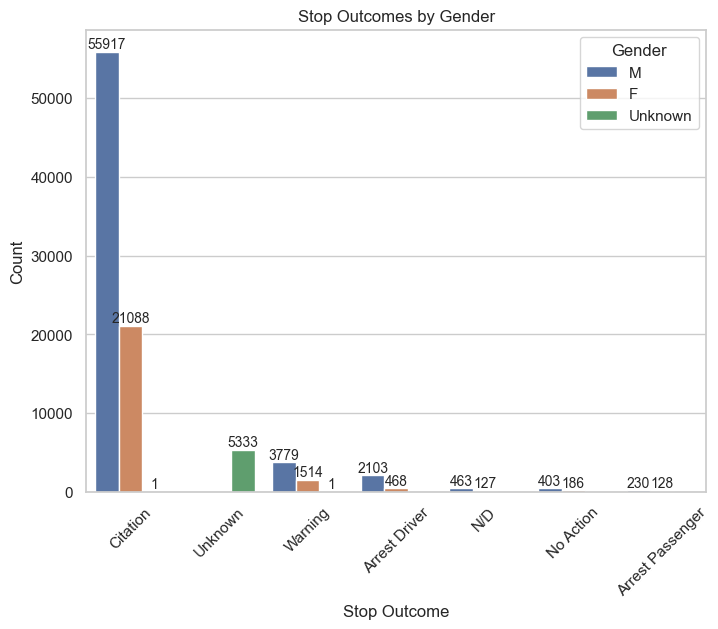

In [76]:
#stop_outcome vs. driver_gender
plt.figure(figsize=(8, 6))
bars = sns.countplot(data=police_data, x='stop_outcome', hue='driver_gender', order=police_data['stop_outcome'].value_counts().index)
for bar in bars.patches:
    count = int(bar.get_height())
    if count > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{count}',
            ha='center', va='bottom', fontsize=10
        )
plt.title('Stop Outcomes by Gender')
plt.xlabel('Stop Outcome')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45)
plt.show()

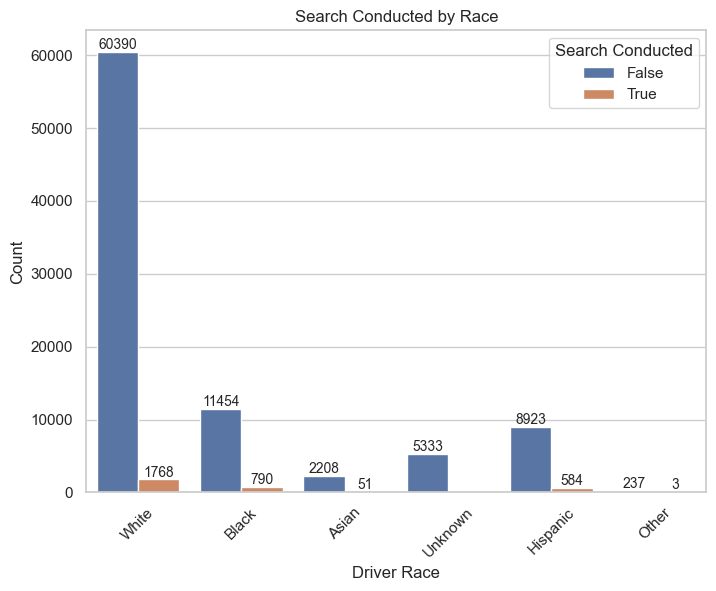

In [77]:
#search_conducted vs. driver_race
plt.figure(figsize=(8, 6))
bars = sns.countplot(data=police_data, x='driver_race', hue='search_conducted')
for bar in bars.patches:
    count = int(bar.get_height())
    if count > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{count}',
            ha='center', va='bottom', fontsize=10
        )
plt.title('Search Conducted by Race')
plt.xlabel('Driver Race')
plt.ylabel('Count')
plt.legend(title='Search Conducted', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [102]:
print(police_data['stop_duration'].unique())

['0-15 Min' '16-30 Min' '30+ Min' 'Unknown' '2' '1']


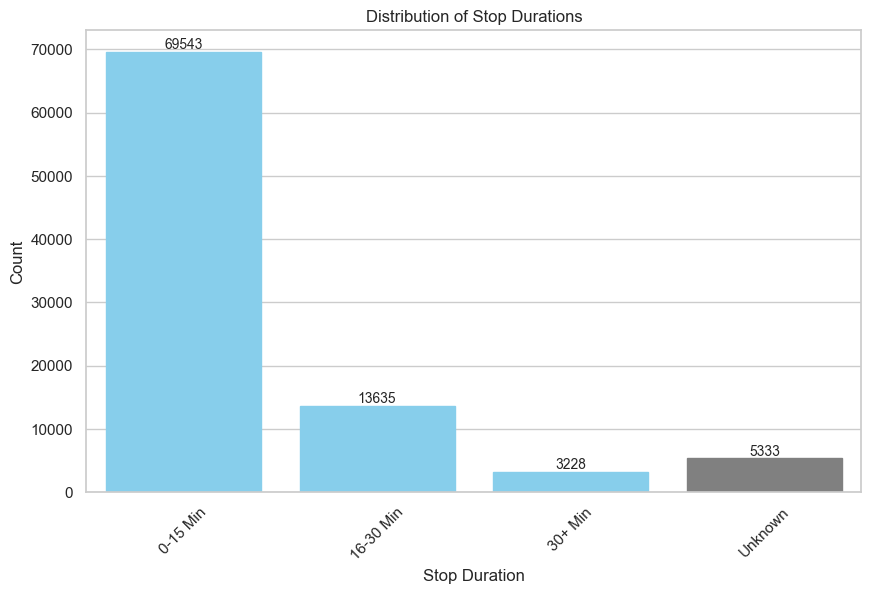

In [105]:
# Filter valid stop_duration categories
valid_durations = ['0-15 Min', '16-30 Min', '30+ Min', 'Unknown']
police_data_filtered = police_data[police_data['stop_duration'].isin(valid_durations)]

# Plot the distribution of stop durations
plt.figure(figsize=(10, 6))
bars = sns.countplot(
    data=police_data_filtered,
    x='stop_duration',
    order=valid_durations  # Use the filtered categories in the correct order
)

# Assign colors manually
colors = {'Unknown': 'gray', '0-15 Min': 'skyblue', '16-30 Min': 'skyblue', '30+ Min': 'skyblue'}
for bar, category in zip(bars.patches, valid_durations):
    bar.set_color(colors.get(category, 'lightblue'))  # Assign colors based on categories

# Add counts on top of the bars
for bar in bars.patches:
    count = int(bar.get_height())
    if count > 0:  # Avoid displaying for zero-height bars
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{count}',
            ha='center', va='bottom', fontsize=10
        )

plt.title('Distribution of Stop Durations')
plt.xlabel('Stop Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [100]:
import itertools

In [97]:
# Filter valid stop_duration categories
valid_durations = ['0-15 Min', '16-30 Min', '30+ Min', 'Unknown']
police_data_filtered = police_data[police_data['stop_duration'].isin(valid_durations)]

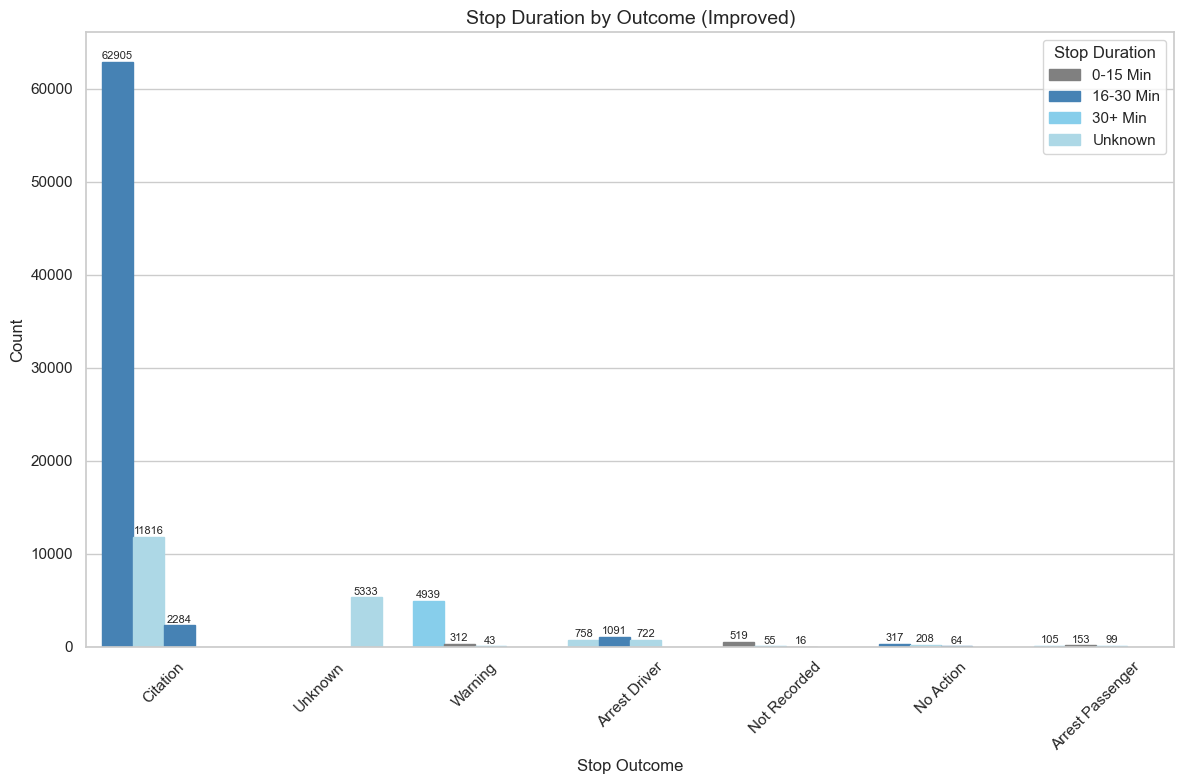

In [101]:
# Replace unclear labels like 'N/D'
police_data_filtered.loc[police_data_filtered['stop_outcome'] == 'N/D', 'stop_outcome'] = 'Not Recorded'

# Plot stop duration by outcome
plt.figure(figsize=(12, 8))  # Increased figure size for better clarity
bars = sns.countplot(
    data=police_data_filtered, 
    x='stop_outcome', 
    hue='stop_duration', 
    order=police_data_filtered['stop_outcome'].value_counts().index
)

# Assign colors manually using itertools.cycle to repeat colors
colors = {'Unknown': 'gray', '0-15 Min': 'steelblue', '16-30 Min': 'skyblue', '30+ Min': 'lightblue'}
duration_cycle = itertools.cycle(valid_durations)  # Cycle through valid durations

for bar in bars.patches:
    duration = next(duration_cycle)  # Get the next duration from the cycle
    bar.set_color(colors.get(duration, 'lightblue'))  # Assign color

# Add counts on top of bars, adjusting positions
for bar in bars.patches:
    count = int(bar.get_height())
    if count > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # Position horizontally
            bar.get_height() + 50,  # Add space above the bar
            f'{count}',  # Display count
            ha='center', va='bottom', fontsize=8  # Smaller font for clarity
        )

# Add title and labels
plt.title('Stop Duration by Outcome (Improved)', fontsize=14)
plt.xlabel('Stop Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend(title='Stop Duration', loc='upper right')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()